In [89]:
using ParallelTemperingMonteCarlo
using Random,Plots

#set random seed - for reproducibility
Random.seed!(1234)
AtoBohr = 1.8897259886

# temperature grid
ti = 30.
tf = 60.
n_traj = 32

temp = TempGrid{n_traj}(ti,tf) 

# MC simulation details
mc_cycles = 1000000 #default 20% equilibration cycles on top
mc_sample = 1  #sample every mc_sample MC cycles

#move_atom=AtomMove(n_atoms) #move strategy (here only atom moves, n_atoms per MC cycle)
displ_atom = 0.1 # Angstrom
n_adjust = 100


#ELJpotential (even c) for argon
c=[-123.635101619510, 21262.8963716972, -3239750.64086661, 189367623.844691, -4304257347.72069, 35315085074.3605]

n_bin = 100

r_min = 3.7782*AtoBohr

7.13976273012852

In [90]:
#ARGON N function
function MCArN(n_atoms, pos, bc, temp)
    pot = ELJPotentialEven{6}(c)

    max_displ_atom = [0.1*sqrt(displ_atom*temp.t_grid[i]) for i in 1:n_traj]
    
    pos = pos * AtoBohr
    mc_params = MCParams(mc_cycles, n_traj, n_atoms, mc_sample = mc_sample, n_adjust = n_adjust)
    
    #moves - allowed at present: atom, volume and rotation moves (volume,rotation not yet implemented)
    move_strat = MoveStrategy(atom_moves = n_atoms)
 
    #ensemble
    ensemble = NVT(n_atoms)  
    length(pos) == n_atoms || error("number of atoms and positions not the same - check starting config")
    #starting configuration
    start_config = Config(pos, bc)
    #construct array of MCState (for each temperature)
    mc_states = [MCState(temp.t_grid[i], temp.beta_grid[i], start_config, pot; max_displ=[max_displ_atom[i],0.01,1.]) for i in 1:n_traj]
    #results = Output(n_bin, max_displ_vec)
    results = Output{Float64}(n_bin; en_min = mc_states[1].en_tot)
    ptmc_run!(mc_states, move_strat, mc_params, pot, ensemble, results)
    #plot script
    plot(temp.t_grid, results.heat_cap)
    plot!(xlabel = "Temperature (K)", ylabel = "Heat Capacity (J/K)", legend = false)   
end

MCArN (generic function with 1 method)

Running ArN function w different values of N and adjusting boundary conditions

Total number of moves per MC cycle: 13



equilibration done


MC loop done.


[0.0027583570520483, 0.0029129620866801594, 0.00325725223285058, 0.003519243847584213, 0.003906715722345249, 0.004286699672633135, 0.004994155817163775, 0.00570620054699964, 0.006377045753314913, 0.007175870295436834, 0.00809364901580399, 0.008771208637980279, 0.010014961015520326, 0.010937437897662154, 0.011471408049580249, 0.011532419014843627, 0.011573518808516018, 0.01110981825086051, 0.010724011051830646, 0.009722846624858332, 0.009150528320963705, 0.008646804987741766, 0.008399380629286853, 0.007940009433609861, 0.007587283155698817, 0.007289779498640279, 0.007052035379071027, 0.00702040560779184, 0.006874165477165374, 0.006654535014086753, 0.0068817069030526, 0.006734247225030459]


done


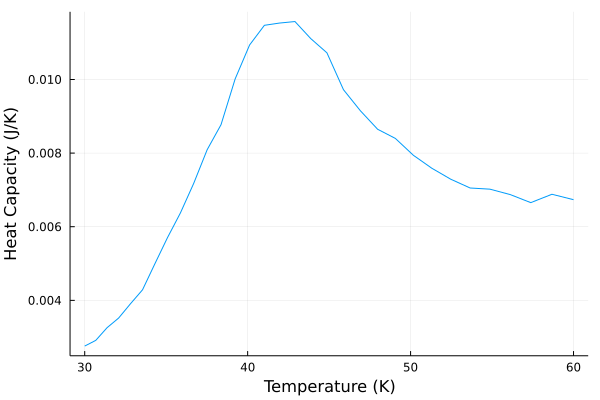

In [91]:
# number of atoms
n_atoms = 13

#starting configurations
#icosahedral ground state of Ar13 (from Cambridge cluster database) in Angstrom
pos_ar13 = [[1.0146454029, 0.3334631631, 0.1815411345],
[0.7266170583, -0.7671194819, 0.2391976365],
[0.7303594101, -0.2312674048, -0.7659965259],
[0.3518552267, 0.8302799340, -0.6004109333],
[0.3457999742, -0.0367469397, 1.0260273868],
[0.1141844246, 0.9505001930, 0.5071207534],
[-1.0146454029, -0.3334631631, -0.1815411345],
[-0.1141844246, -0.9505001930, -0.5071207534],
[-0.3518552267, -0.8302799340, 0.6004109333],
[-0.3457999742, 0.0367469397, -1.0260273868],
[-0.7266170583, 0.7671194819, -0.2391976365],
[-0.7303594101, 0.2312674048, 0.7659965259],
[0.0000000000, 0.0000000000, 0.0000000000]
]

#boundary conditions 
bc_ar13 = SphericalBC(radius=1.8125*r_min)

MCArN(n_atoms, pos_ar13, bc_ar13, temp)

Total number of moves per MC cycle: 12



equilibration done


MC loop done.


[0.0034115582129157235, 0.0035386697984243977, 0.003822648119280479, 0.004081094199512599, 0.004208384864790256, 0.004525169613073966, 0.004843270888896948, 0.005220310142947467, 0.005413244528393751, 0.005504253167785246, 0.0056238472581596425, 0.005927277593436037, 0.005910322295540782, 0.005978097641098014, 0.005982560852159178, 0.005846091837995997, 0.00591520573867149, 0.005704603394752, 0.005700229533372467, 0.005609122319172586, 0.005524141089610482, 0.005510727121673765, 0.0053377995091942985, 0.005286307188148503, 0.0052992731501660855, 0.005183610563090325, 0.005170805907002441, 0.005162125383146804, 0.005154243562135114, 0.005110904946463283, 0.0051322004905676195, 0.00509692945159045]


done


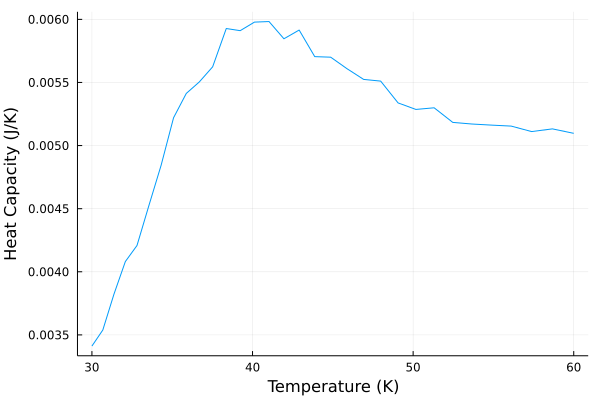

In [92]:
# number of atoms
n_atoms = 12

#starting configurations
pos_ar12 = [[0.7266170583, -0.7671194819, 0.2391976365],
[0.7303594101, -0.2312674048, -0.7659965259],
[0.3518552267, 0.8302799340, -0.6004109333],
[0.3457999742, -0.0367469397, 1.0260273868],
[0.1141844246, 0.9505001930, 0.5071207534],
[-1.0146454029, -0.3334631631, -0.1815411345],
[-0.1141844246, -0.9505001930, -0.5071207534],
[-0.3518552267, -0.8302799340, 0.6004109333],
[-0.3457999742, 0.0367469397, -1.0260273868],
[-0.7266170583, 0.7671194819, -0.2391976365],
[-0.7303594101, 0.2312674048, 0.7659965259],
[0.0000000000, 0.0000000000, 0.0000000000]
]

#boundary conditions 
bc_ar12 = SphericalBC(radius=1.625*r_min)

MCArN(n_atoms, pos_ar12, bc_ar12, temp)

Total number of moves per MC cycle: 11



equilibration done


MC loop done.


[0.0012269774554258782, 0.0013130730656674809, 0.0013622007872412958, 0.0014461058126123158, 0.00151043344441092, 0.001573585476895734, 0.0016392328055677811, 0.0016854308974992992, 0.0017192724295601698, 0.001749477976748699, 0.001759361827727703, 0.0017351488303083982, 0.0017272485077789068, 0.001735012902282721, 0.0016917499483082026, 0.0016614584804985715, 0.0016153537229636156, 0.0016027191646341237, 0.0015692646559694534, 0.0015396933450470046, 0.0015251891763297866, 0.0015143739784412062, 0.0014919665525612426, 0.0014747020727438587, 0.00148473636402306, 0.0014767116227896034, 0.0014801934674567162, 0.0015042755030843355, 0.0015075550626981254, 0.0015269977957321655, 0.0015227099829139771, 0.0015441603166264648]


done


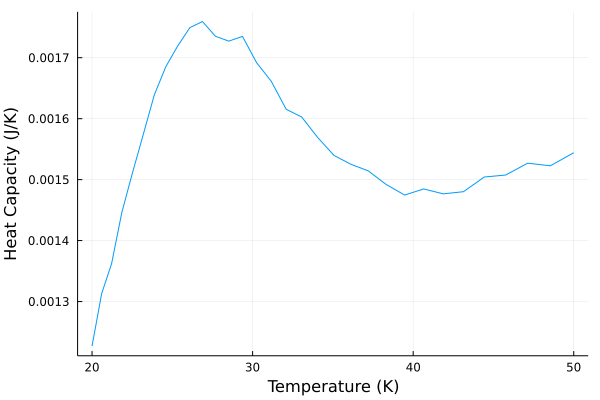

In [93]:
# number of atoms
n_atoms = 11

#starting configurations
pos_ar11 = [[0.7303594101, -0.2312674048, -0.7659965259],
[0.3518552267, 0.8302799340, -0.6004109333],
[0.3457999742, -0.0367469397, 1.0260273868],
[0.1141844246, 0.9505001930, 0.5071207534],
[-1.0146454029, -0.3334631631, -0.1815411345],
[-0.1141844246, -0.9505001930, -0.5071207534],
[-0.3518552267, -0.8302799340, 0.6004109333],
[-0.3457999742, 0.0367469397, -1.0260273868],
[-0.7266170583, 0.7671194819, -0.2391976365],
[-0.7303594101, 0.2312674048, 0.7659965259],
[0.0000000000, 0.0000000000, 0.0000000000]
]

#boundary conditions 
bc_ar11 = SphericalBC(radius=0.97500*r_min)

#adjusted temperature grid to fit heat capacity peak
ti2 = 20.
tf2 = 50.

temp2 = TempGrid{n_traj}(ti2,tf2) 

MCArN(n_atoms, pos_ar11, bc_ar11, temp2)

Total number of moves per MC cycle: 10



equilibration done


MC loop done.
[0.0010977730425546825, 0.001282024167834812, 0.0014305594372198249, 0.0014714702613274433, 0.0016597172217208628, 0.0019282545310990472, 0.002278684696767974,

 0.002633160208470439, 0.0030257817125574735, 0.003181285110775717, 0.0034000976159576216, 0.0034809758405799384, 0.0034872398919473992, 0.0033778161688675953, 0.003197370569235113, 0.0028540779672350646, 0.002691235809819235, 0.002319011160849899, 0.002153796622544785, 0.0018936443426333803, 0.0017280071514208465, 0.00162113619972139, 0.0015214367551298854, 0.00145153242247202, 0.0013861562503792873, 0.00138362601023747, 0.001384384563155844, 0.001353042755028162, 0.0013343331964118844, 0.0013499526800118027, 0.0013540531678778592, 0.001361055650135562]


done


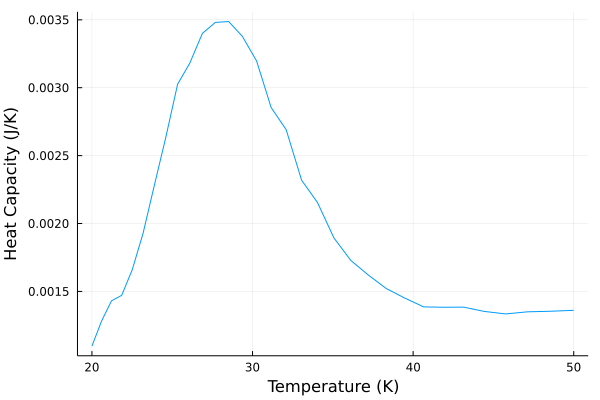

In [94]:
# number of atoms
n_atoms = 10

#starting configurations
pos_ar10 = [[0.3518552267, 0.8302799340, -0.6004109333],
[0.3457999742, -0.0367469397, 1.0260273868],
[0.1141844246, 0.9505001930, 0.5071207534],
[-1.0146454029, -0.3334631631, -0.1815411345],
[-0.1141844246, -0.9505001930, -0.5071207534],
[-0.3518552267, -0.8302799340, 0.6004109333],
[-0.3457999742, 0.0367469397, -1.0260273868],
[-0.7266170583, 0.7671194819, -0.2391976365],
[-0.7303594101, 0.2312674048, 0.7659965259],
[0.0000000000, 0.0000000000, 0.0000000000]
]

#boundary conditions 
bc_ar10 = SphericalBC(radius=0.94375*r_min)

MCArN(n_atoms, pos_ar10, bc_ar10, temp2)

Total number of moves per MC cycle: 9



equilibration done


MC loop done.


[0.0004359074137354146, 0.0004754489285956212, 0.0004945340371526411, 0.000545583766899935, 0.0006266704625041637, 0.0007419193222404808, 0.0008756794925318642, 0.0010210183226297507, 0.0012113224490552632, 0.00147659183116884, 0.0016909126147522456, 0.0018491567789903863, 0.0019824744982910206, 0.0019689160635289935, 0.0019115152037127395, 0.0017753329418037356, 0.001566365918128405, 0.0013644283532453006, 0.0011961464012380171, 0.0011098307164731924, 0.0010260353275508493, 0.00098773814257261, 0.000944105458097687, 0.0009331135082040794, 0.0009327557217578704, 0.0009502680833488412, 0.0009321510458386469, 0.0009387563859172807, 0.0009526867562028965, 0.0009592168076740879, 0.0009759305484892337, 0.0009821465962805552]


done


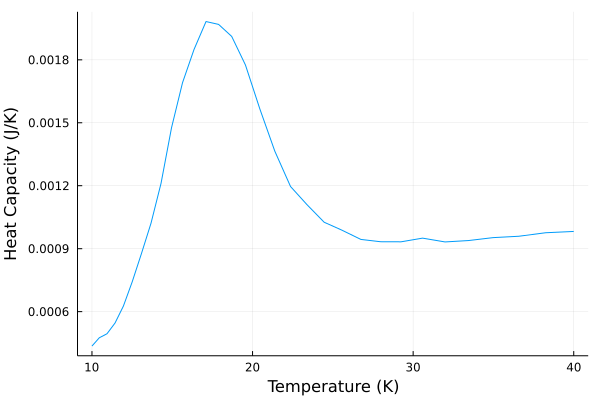

In [95]:
# number of atoms
n_atoms = 9

#starting configurations
pos_ar9 = [[0.3457999742, -0.0367469397, 1.0260273868],
[0.1141844246, 0.9505001930, 0.5071207534],
[-1.0146454029, -0.3334631631, -0.1815411345],
[-0.1141844246, -0.9505001930, -0.5071207534],
[-0.3518552267, -0.8302799340, 0.6004109333],
[-0.3457999742, 0.0367469397, -1.0260273868],
[-0.7266170583, 0.7671194819, -0.2391976365],
[-0.7303594101, 0.2312674048, 0.7659965259],
[0.0000000000, 0.0000000000, 0.0000000000]
]

#boundary conditions 
bc_ar9 = SphericalBC(radius=0.94375*r_min)

#adjusted temperature grid to fit heat capacity peak
ti2 = 10.
tf2 = 40.

temp3 = TempGrid{n_traj}(ti2,tf2) 

MCArN(n_atoms, pos_ar9, bc_ar9, temp3)

Total number of moves per MC cycle: 8



equilibration done


MC loop done.


[0.00036527556786565714, 0.00038852353094397514, 0.0004024678828174798, 0.0004233962063227958, 0.00044015216489471135, 0.00045735945648718986, 0.0004867660445635454, 0.0005100396754998817, 0.0005291499108270579, 0.0005618398771595093, 0.0005769942493247122, 0.0006132058005386438, 0.000643037763511647, 0.000685407657017443, 0.0006996638796338822, 0.0007447562155095561, 0.0007960041183188983, 0.0008203728305927634, 0.000867822579730375, 0.0008957993629198416, 0.0009397108536448711, 0.0009772586110803783, 0.001023008031607108, 0.0010668488805082928, 0.0011106852678199471, 0.0011358671280023744, 0.001188687104444057, 0.0012180176677601582, 0.0012409822045398693, 0.0012857714964635508, 0.0012997428108178512, 0.0013485083047730777]


done


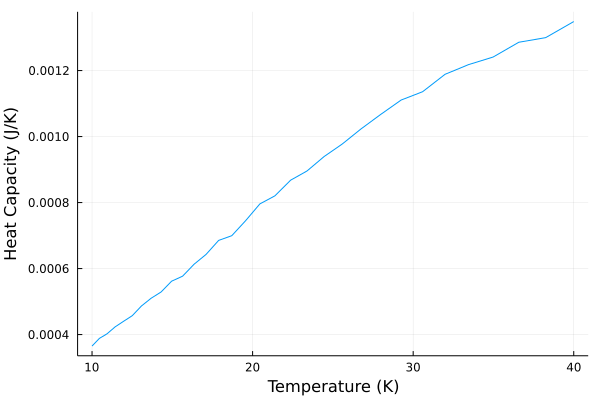

In [96]:
# number of atoms
n_atoms = 8

#starting configurations
pos_ar8 = [[0.1141844246, 0.9505001930, 0.5071207534],
[-1.0146454029, -0.3334631631, -0.1815411345],
[-0.1141844246, -0.9505001930, -0.5071207534],
[-0.3518552267, -0.8302799340, 0.6004109333],
[-0.3457999742, 0.0367469397, -1.0260273868],
[-0.7266170583, 0.7671194819, -0.2391976365],
[-0.7303594101, 0.2312674048, 0.7659965259],
[0.0000000000, 0.0000000000, 0.0000000000]
]

#boundary conditions 
bc_ar8 = SphericalBC(radius=1*r_min)

MCArN(n_atoms, pos_ar8, bc_ar8, temp3)